#  **IMDB Movie Rating Prediction** 

In [1]:
# Step 1: Import the necessary libraries
import pandas as pd  # Data manipulation
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # For train-test split
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.linear_model import LinearRegression  # Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics


In [25]:
# Step 2: Load the dataset
df = pd.read_csv(r"C:\Users\comp\Downloads\IMDb_Movies_India.csv", encoding='latin1')
# to presence of some special characters and thus due to strange characters it gives UnicodeDecodeError.
# Tell pandas to read with differrent encoding. latin1 are older encodings that allows random bytes to be read without error.

In [ ]:
# Clean Year column 
df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')   # Extract 4-digit year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\comp\AppData\Local\Temp\ipykernel_9124\3041483940.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Year'] = df['Year'].astype(str).str.extract('(\d{4})')   # Extract 4-digit year


In [47]:
# Convert Duration to numeric
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [ ]:
# Clean Votes column 
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [50]:
# Fill missing Duration with median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

# Fill missing Year with mode
df['Year'].fillna(df['Year'].mode()[0], inplace=True)

# Fill missing Votes with median
df['Votes'].fillna(df['Votes'].median(), inplace=True)

# Fill missing categorical columns with 'Unknown'
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[col].fillna('Unknown', inplace=True)

C:\Users\comp\AppData\Local\Temp\ipykernel_9124\701554029.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration'].fillna(df['Duration'].median(), inplace=True)
C:\Users\comp\AppData\Local\Temp\ipykernel_9124\701554029.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [26]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [28]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [29]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# EDA(Exploratory Data Analysis)

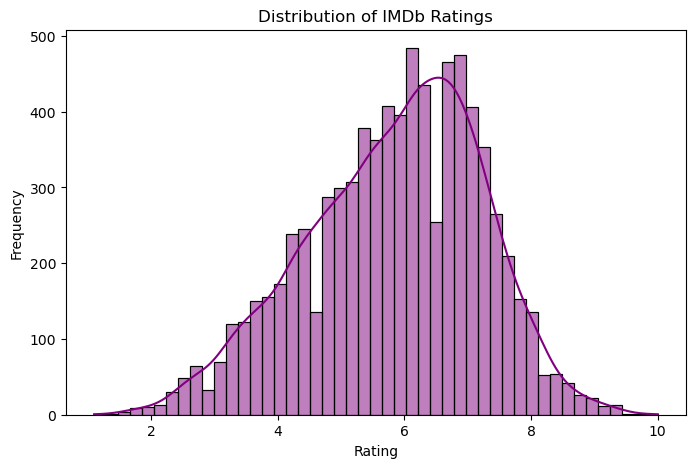

In [30]:
# Plot distribution of IMDb ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\comp\AppData\Local\Temp\ipykernel_9124\3141188727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:10], palette='magma')


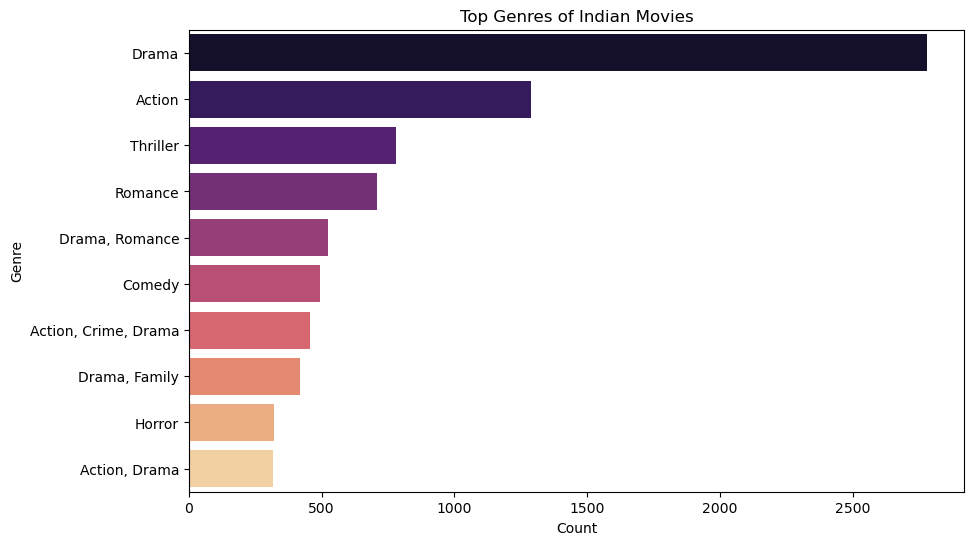

In [31]:
# Most common genres
plt.figure(figsize=(10,6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index[:10], palette='magma')
plt.title('Top Genres of Indian Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [33]:
# Drop rows where 'Rating' is missing (target variable)
df = df.dropna(subset=['Rating'])

# Fill missing values in 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3' with 'Unknown'
fill_columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for col in fill_columns:
    df[col].fillna('Unknown', inplace=True)

C:\Users\comp\AppData\Local\Temp\ipykernel_9124\1369744630.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [51]:
# Drop rows where Rating is missing
df = df.dropna(subset=['Rating'])

# Encoding

In [52]:
df['Main_Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

# Combine Actor names
df['Actor_Combo'] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']

# Encode categorical columns
le = LabelEncoder()
df['Main_Genre_encoded'] = le.fit_transform(df['Main_Genre'])
df['Director_encoded'] = le.fit_transform(df['Director'])
df['Actor_Combo_encoded'] = le.fit_transform(df['Actor_Combo'])

# Feature Selection

In [53]:
features = ['Main_Genre_encoded', 'Director_encoded', 'Actor_Combo_encoded', 'Year', 'Duration', 'Votes']
X = df[features]
y = df['Rating']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [61]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error (MSE): 1.37
R2 Score: 0.26


# Model Evaluation

In [59]:
predicted_ratings = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})
print(predicted_ratings.head())

       Actual Rating  Predicted Rating
9456             3.3             4.225
14816            5.3             5.342
3213             5.7             6.992
3778             7.2             3.981
5775             3.5             5.102


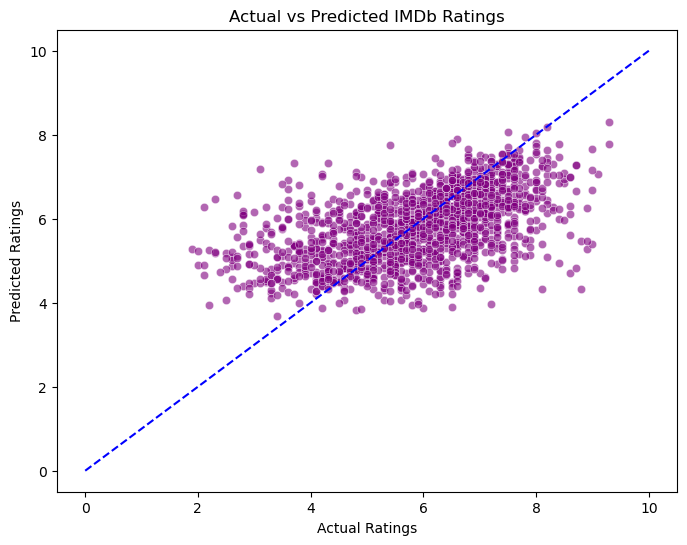

In [62]:
# Actual vs Predicted Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.plot([0, 10], [0, 10], 'blue', linestyle='--')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted IMDb Ratings')
plt.show()


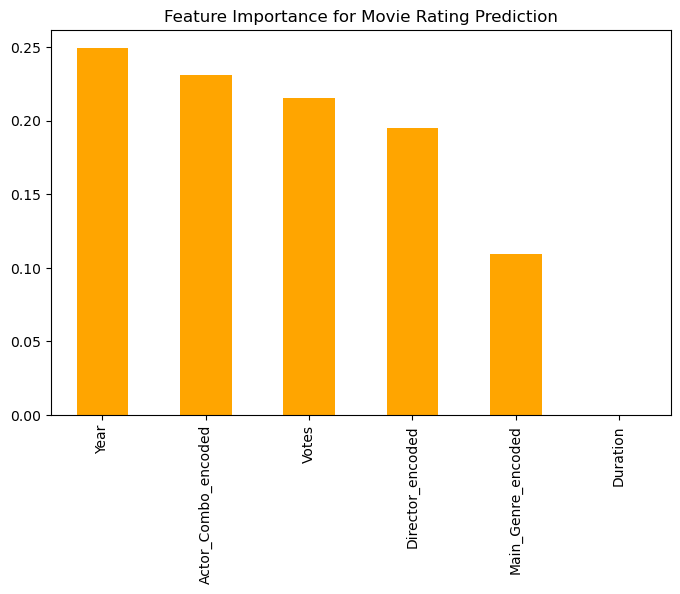

In [63]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(8,5))
plt.title('Feature Importance for Movie Rating Prediction')
plt.show()

# **Conclusion**

- The model can predict IMDb ratings reasonably well using Genre, Director, Actor Combo, Year, Duration, and Votes.
- Duration cleaning was important — converted to numeric safely.
- Year, Actor_Combo_encoded, Votes (popularity) plays an important role in determining the rating.
- Random Forest provided good performance without heavy tuning.
- Better results may be achieved by adding more features (budget, reviews).
